## US Visa Approval Prediction

#### Project Steps

- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Data Pre-processing
- Model Training
- Choose Best Model

#### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. 
The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

### 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

#### 2.1 Import Data and Required Packages

In [1]:
# importing the required packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")



In [ ]:
import stikpetP as ps

**Imporintg the csv dataset**

In [2]:
df = pd.read_csv('Visadataset.csv')

**Checking the few top and bottom records to gauge the data**

In [3]:
df.head(7)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified


In [4]:
df.tail(7)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.56,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.78,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Shape of the data**

In [5]:
df.shape

(25480, 12)

**Dataset Summary**

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Checking Datatypes in dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Checking duplicate values**

In [8]:
df.duplicated().sum()

0

**Checking for na values**

In [9]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Initial Insights**

- The dataset has 25480 rows and 12 columns.
- It is a mix of numeric and categorical variables.
- There are no missing values in the dataset.
- The dataset does not have any duplicate values.

### 3. Exploring and Visualizing Data. 

In [10]:
# segregating the numeric and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### Univariate Analysis

- In univariate analysis, we shall analyse each of the numeric and categorical variables.

**Numerical Features**

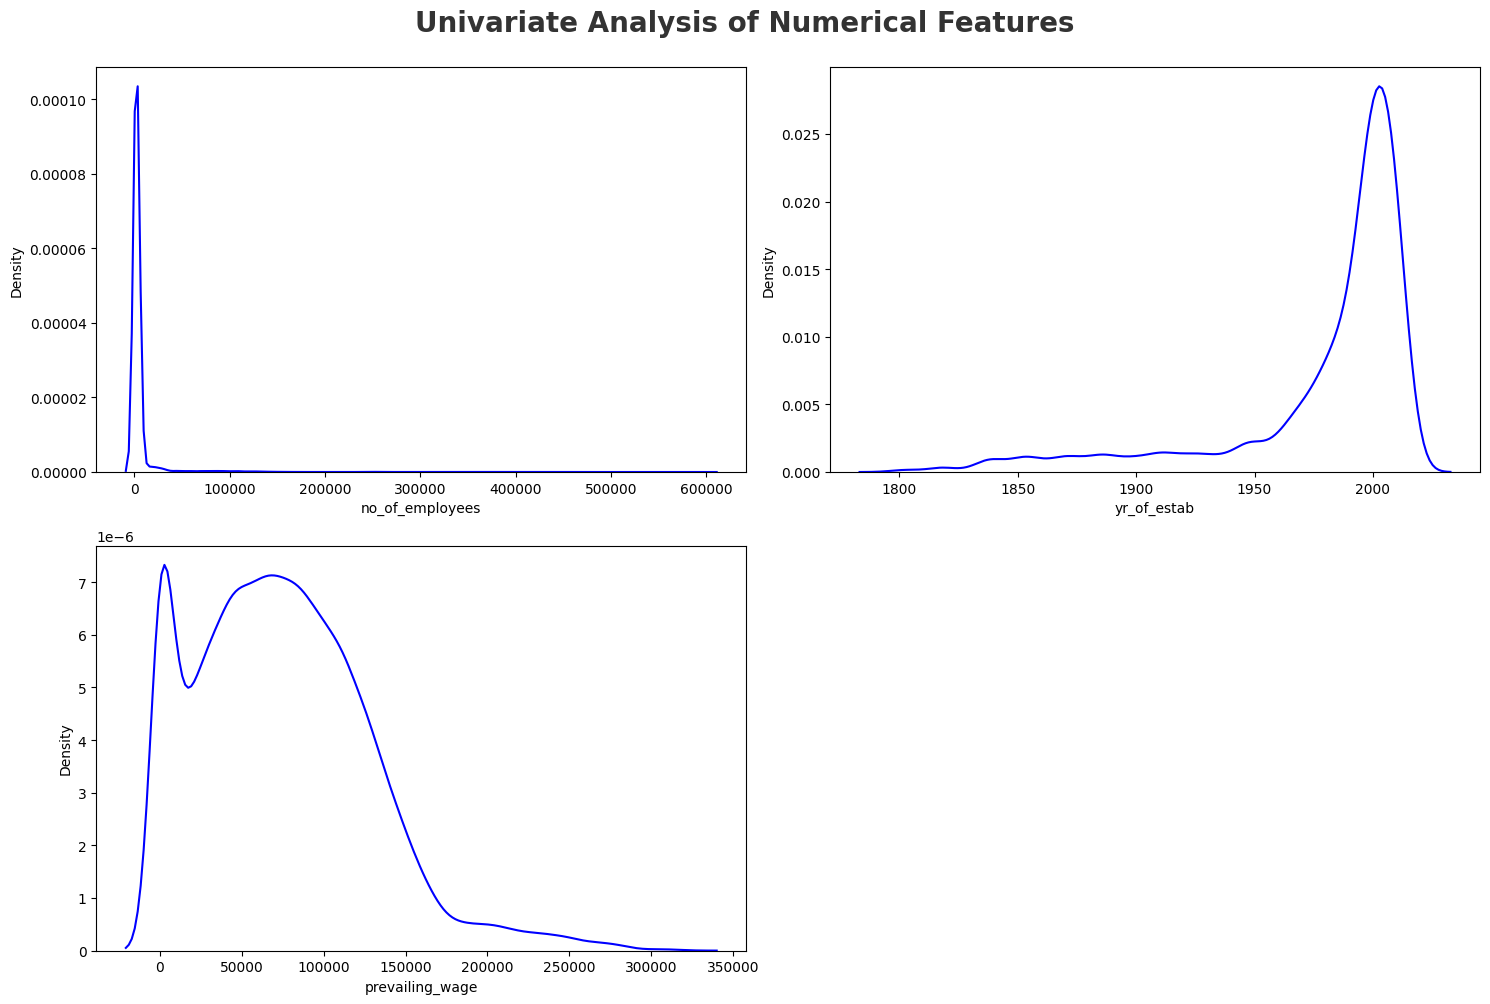

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Insight**

- no_of_employees and prevailing_wage are right skewed.
- yr_of_estb is a right skewed column.

**Categorical Columns**

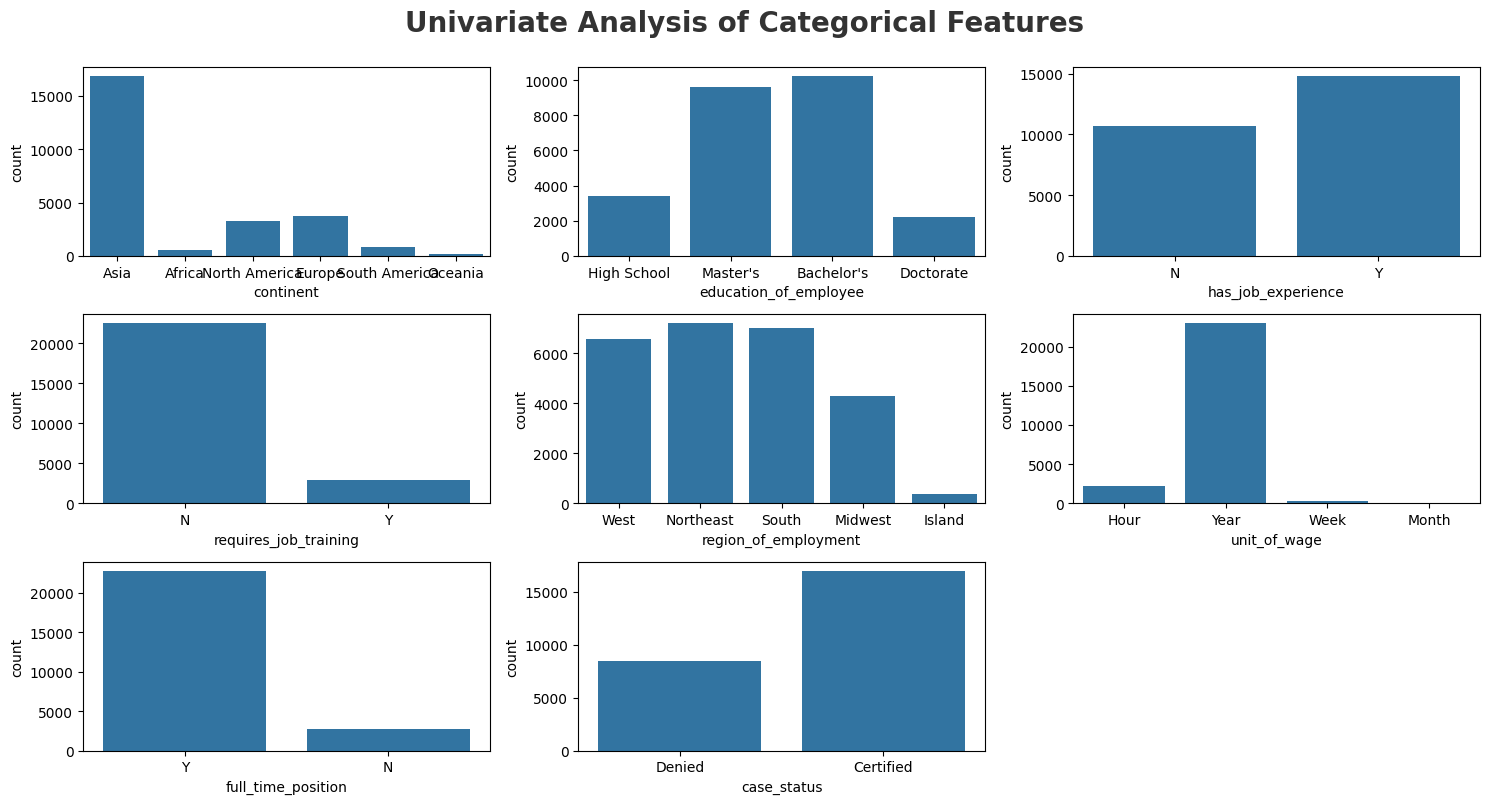

In [12]:
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

**Insight**

- requires_job_training, unit_of_wage, full_time_position and continents columns have a single dominating category.
- Rest of the columns are balanced.

**Checking the proportion count of each of the categories in the categorical variables**

In [13]:
# case_id

df["case_id"].value_counts(normalize=True) * 100

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64

In [14]:
df["continent"].value_counts(normalize=True) * 100

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

In [15]:
df["education_of_employee"].value_counts(normalize=True) * 100

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

In [16]:
df["has_job_experience"].value_counts(normalize=True) * 100

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

In [17]:
df["requires_job_training"].value_counts(normalize=True) * 100

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

In [18]:
df["region_of_employment"].value_counts(normalize=True) * 100

region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64

In [19]:
df["unit_of_wage"].value_counts(normalize=True) * 100

unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64

In [20]:
df["full_time_position"].value_counts(normalize=True) * 100

full_time_position
Y    89.375981
N    10.624019
Name: proportion, dtype: float64

In [21]:
df["case_status"].value_counts(normalize=True) * 100

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64

**Insight**
- 'case_id' has unique columns.
- for rest of the columns some values are more dominent than the others.
- the 'case_status' variable which we are going to predict has twice more visa certified than not certified.

### Multivariate Analysis

- In multivariate analysis, we will shall understand the relationship between multiple variable.
- Also, we shall consider realtionship of the 'case_status' variable, with the numeric and categorical variables and what influence do each of them have on the 'case_status' variable.

**Numeric Variables**

In [27]:
# we will separate out the numeric variables:
df_corr = df[['no_of_employees', 'yr_of_estab', 'prevailing_wage']]
df_corr.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


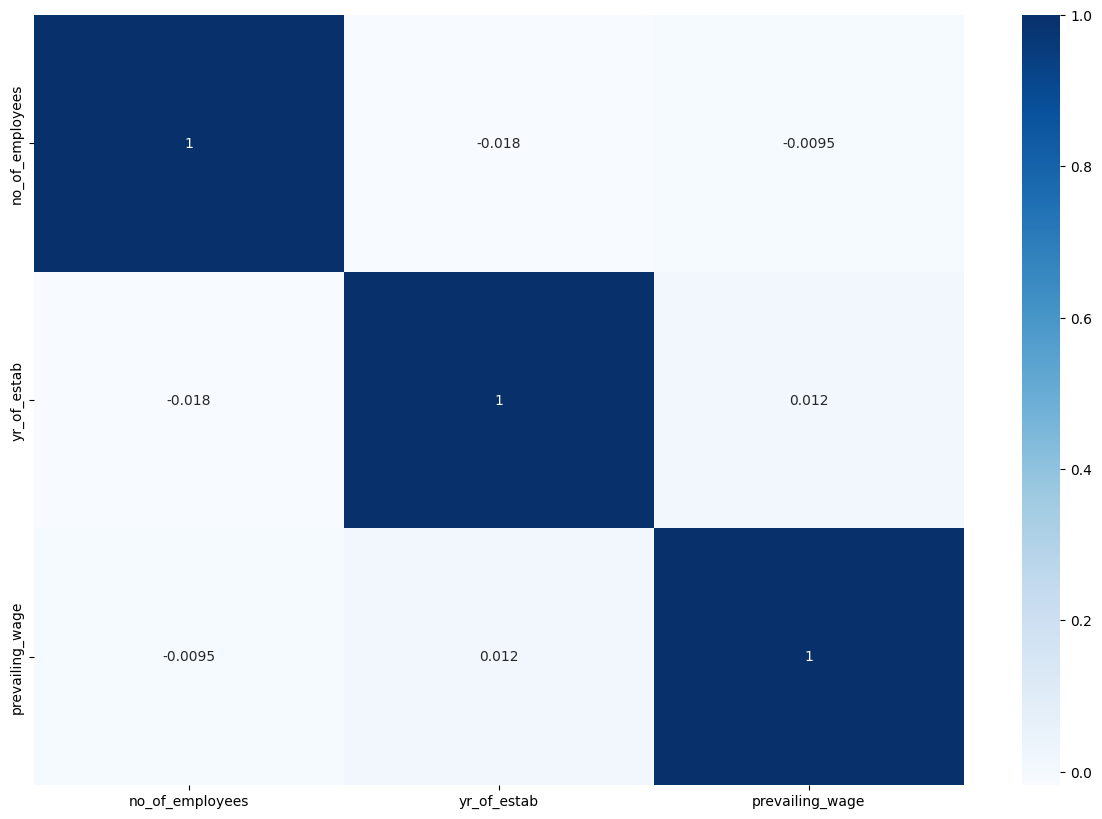

In [28]:
# plotting a heatmap for the numeric variables:
plt.figure(figsize = (15,10))
sns.heatmap(df_corr.corr(), cmap="Blues", annot=True)
plt.show()

**Insight**

- There is no multi-collinearity in any of the variables.

'no_of_employees', 'yr_of_estab', 'prevailing_wage'

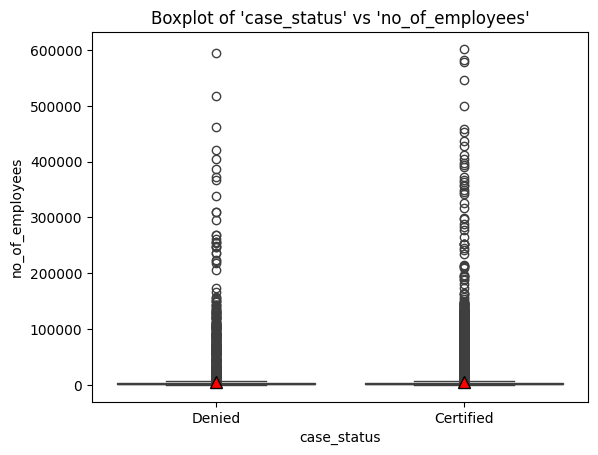

In [38]:
# checking the relationship between the target and numeric variables.

sns.boxplot(data = df, x = 'case_status', y = 'no_of_employees', showmeans=True,
            meanprops={
                       'markerfacecolor':'red', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
plt.title("Boxplot of 'case_status' vs 'no_of_employees'")
plt.show()

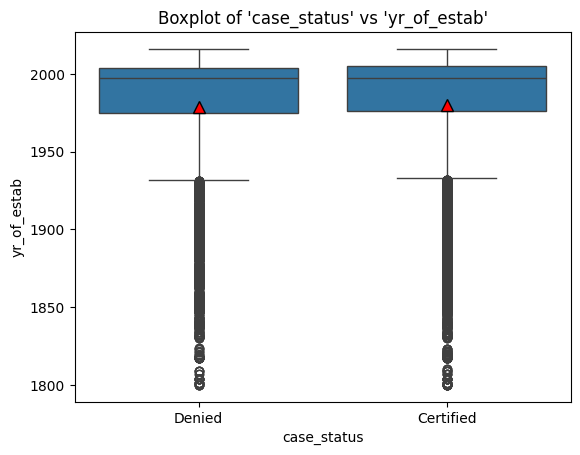

In [39]:
sns.boxplot(data = df, x = 'case_status', y = 'yr_of_estab', showmeans=True,
            meanprops={
                       'markerfacecolor':'red', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
plt.title("Boxplot of 'case_status' vs 'yr_of_estab'")
plt.show()

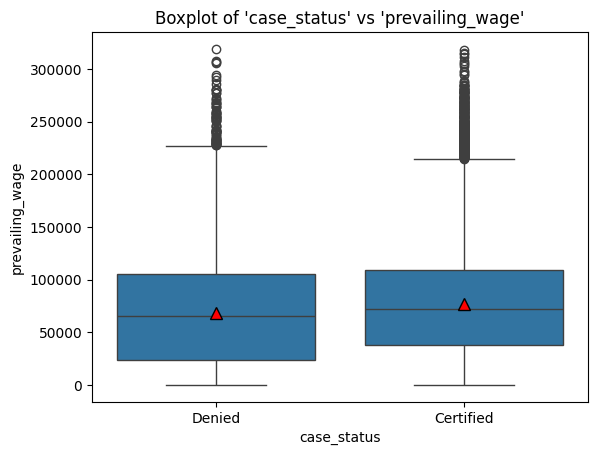

In [40]:
sns.boxplot(data = df, x = 'case_status', y = 'prevailing_wage', showmeans=True,
            meanprops={
                       'markerfacecolor':'red', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
plt.title("Boxplot of 'case_status' vs 'prevailing_wage'")
plt.show()

**Insights**

- 'no_of_employees' and 'yr_of_estab' may not have much impact on whether the visa has been approved or not.
- 'prevailing_wage' may have a certain impact on whether the visa is approved or not.


**Categorical Variables**

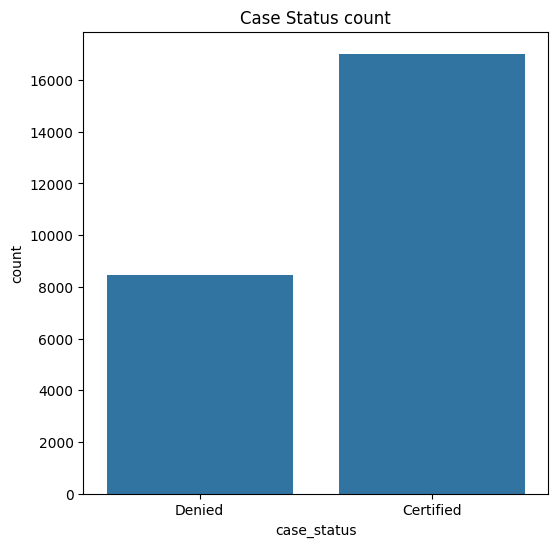

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = "case_status")
plt.title('Case Status count')
plt.show()

**Continent Variable**

In [60]:
df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

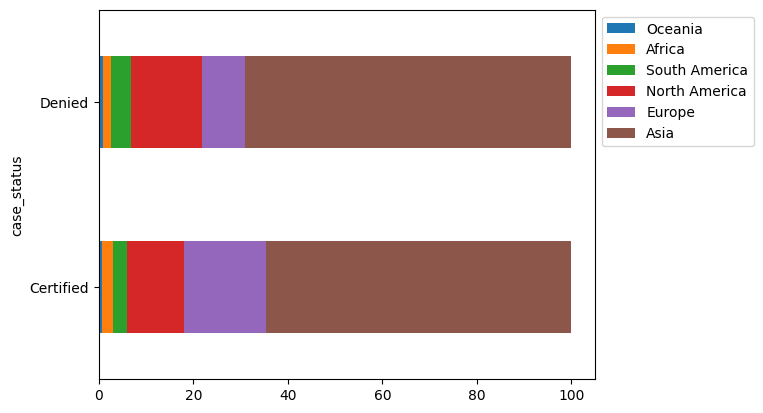

In [62]:
myCoding = {'Oceania': 1, 'Africa': 2, 'South America': 3, 'North America': 4, 'Europe': 5, 'Asia':6}
ps.vi_bar_stacked_multiple(df['case_status'], df['continent'], levels=myCoding)

**Education of Employee Variable**

In [70]:
df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

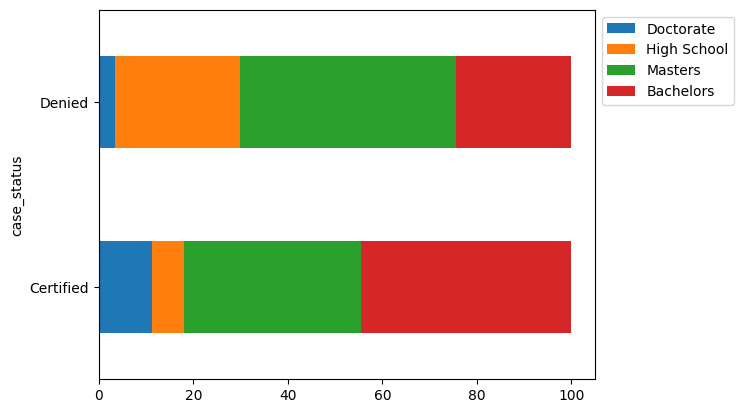

In [71]:
myCoding = {'Doctorate': 1, 'High School': 2, 'Masters': 3, 'Bachelors': 4}
ps.vi_bar_stacked_multiple(df['case_status'], df['education_of_employee'], levels=myCoding)

**Has job experience variable**

In [72]:
df['has_job_experience'].value_counts()

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

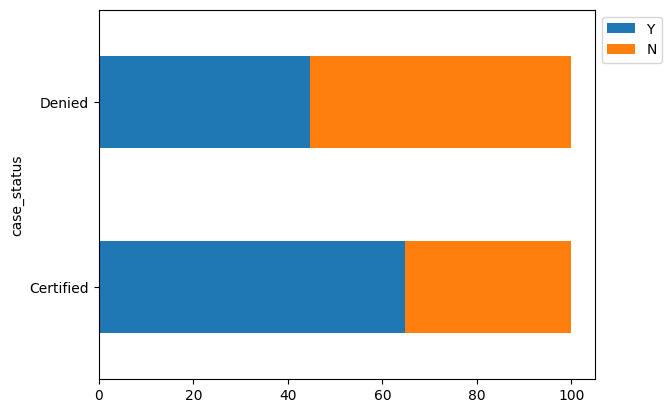

In [73]:
myCoding = {'Y': 1, 'N': 2}
ps.vi_bar_stacked_multiple(df['case_status'], df['has_job_experience'], levels=myCoding)

**Requires Job Training variable**

In [74]:
df['requires_job_training'].value_counts()

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

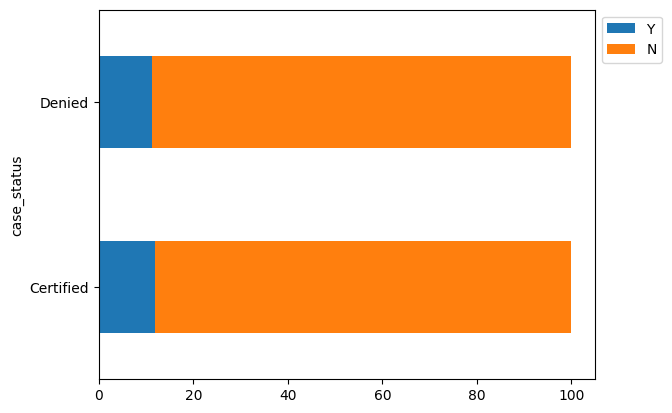

In [75]:
myCoding = {'Y': 1, 'N': 2}
ps.vi_bar_stacked_multiple(df['case_status'], df['requires_job_training'], levels=myCoding)

**Region of Employment Variable**

In [76]:
df['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

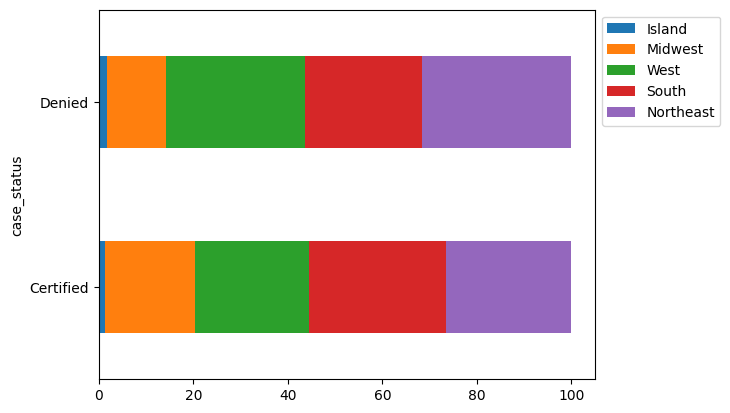

In [78]:
myCoding = {'Island': 1, 'Midwest': 2, 'West': 3, 'South': 4,'Northeast': 5}
ps.vi_bar_stacked_multiple(df['case_status'], df['region_of_employment'], levels=myCoding)

**Unit of Wage varibale**

In [79]:
df['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

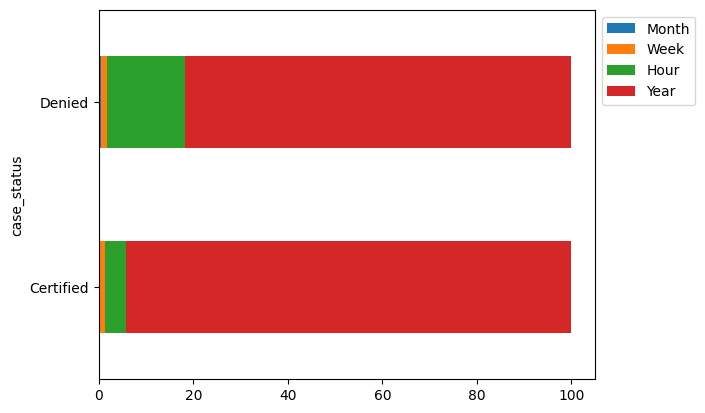

In [80]:
myCoding = {'Month': 1, 'Week': 2, 'Hour': 3, 'Year': 4,}
ps.vi_bar_stacked_multiple(df['case_status'], df['unit_of_wage'], levels=myCoding)

**Full Time Position variable**

In [82]:
df['full_time_position'].value_counts()

full_time_position
Y    22773
N     2707
Name: count, dtype: int64

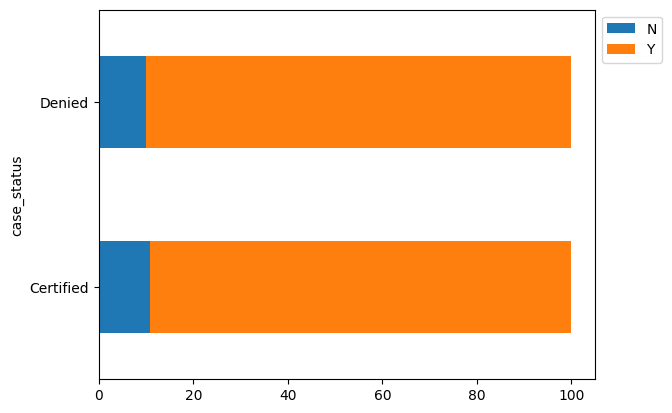

In [83]:
myCoding = {'N': 1, 'Y': 2,}
ps.vi_bar_stacked_multiple(df['case_status'], df['full_time_position'], levels=myCoding)

**Insights**

- For the continent variable, the number of people certified from Europe is more than any of the other continents.
- If you have a bacherlo's or a doctorate degree, your chances of certification are very high, if you have a masters degree you have good chances of getting selected, if you have a high school diploma, your chances of getting certified are very low.
- Job experience increases your chances of getting certified than if you do not have a job experience.
- If one requires training or not does not have much impact on whether you are certified or not.
- If you are getting a job in the south, your chances of getting certified are a little more than other regions.
- A yearly unit of wage has more chances of visa approval than other units of wages.
- If one is applying for a full time position does not impact on whether you are certified or not.